# Projet de prédiction du prix Airbnb

## 1. Chargement des données

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Chargement
train = pd.read_csv("airbnb_train.csv")
test = pd.read_csv("airbnb_test.csv")

print(train.head())
print(test.head())

         id  log_price property_type        room_type  \
0   5708593   4.317488         House     Private room   
1  14483613   4.007333         House     Private room   
2  10412649   7.090077     Apartment  Entire home/apt   
3  17954362   3.555348         House     Private room   
4   9969781   5.480639         House  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Wireless Internet",Kitchen,"Free parking ...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             4        2.0   
2  {TV,"Wireless Internet","Air conditioning",Kit...             6        2.0   
3  {TV,"Cable TV",Internet,"Wireless Internet","A...             1        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   

   bed_type cancellation_policy  cleaning_fee  ... last_review   latitude  \
0  Real Bed            flexible         False  ...         NaN  33.782712   
1  Real Bed     

## 2. Prétraitement

In [14]:
train = train.fillna(0)
test = test.fillna(0)

for col in ['property_type', 'room_type', 'bed_type', 'cancellation_policy']:
    train[col] = train[col].astype('category').cat.codes
    test[col] = test[col].astype('category').cat.codes

features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
            'review_scores_rating', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

X = train[features]
y = train['log_price']
X_test = test[features]

print("Train features shape:", X.shape)
print("Train target shape:", y.shape)
print("Test features shape:", X_test.shape)

Train features shape: (22234, 10)
Train target shape: (22234,)
Test features shape: (51877, 10)


## 3. Exploration données

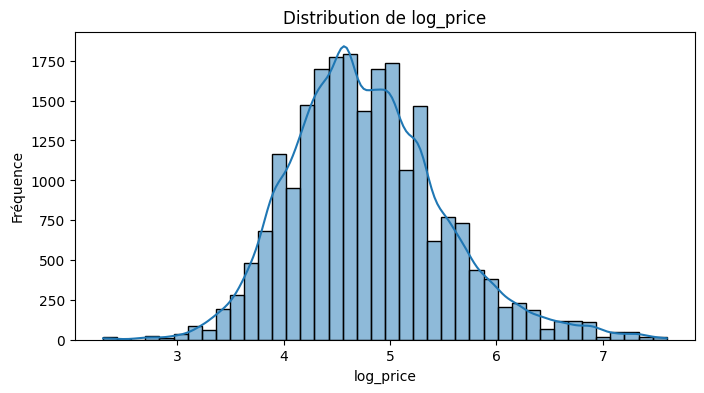

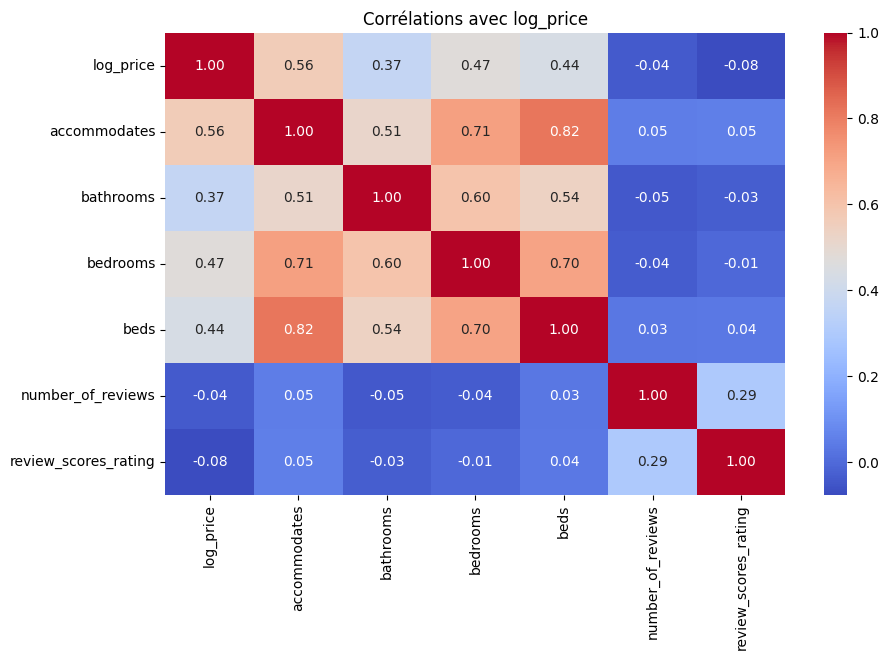

In [15]:
# Distribution de log_price

plt.figure(figsize=(8, 4))
sns.histplot(train['log_price'], bins=40, kde=True)
plt.title("Distribution de log_price")
plt.xlabel("log_price")
plt.ylabel("Fréquence")
plt.show()

# ---------------------------------------

# Corrélations avec log_price
plt.figure(figsize=(10, 6))
corr = train[['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
              'number_of_reviews', 'review_scores_rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélations avec log_price")
plt.show()


## 4. Entraînement et comparaison
 - Régression linéaire
 - Forêt aléatoire
 - XGBoost

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    print(f"{name}: RMSE = {rmse:.4f}")

LinearRegression: RMSE = 0.4950
RandomForest: RMSE = 0.5080
XGBoost: RMSE = 0.4852


## 5. Prédiction et export

In [18]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)
predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    "id": test["Unnamed: 0"] if "Unnamed: 0" in test.columns else test["id"],
    "prediction": predictions
})

submission.to_csv("prediction.csv", index=False)
print("Le fichier 'prediction.csv' a bien été généré.")

Le fichier 'prediction.csv' a bien été généré.
